In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from emmv import emmv_scores
from sklearn.utils import shuffle as sh
from sklearn.metrics import auc
from sklearn.preprocessing import StandardScaler


from pyod.models.iforest import IForest
from pyod.models.lof import LOF
from pyod.models.ocsvm import OCSVM
from pyod.models.knn import KNN
from pyod.models.gmm import GMM
from pyod.models.auto_encoder import AutoEncoder

In [2]:
pd.set_option("display.max_columns", None)  # Tampilkan semua kolom
pd.set_option("display.width", None)        # Hindari pemotongan baris panjang
pd.set_option("display.max_colwidth", None) # Tampilkan isi kolom panjang

In [219]:
import joblib
model = joblib.load("./knn_model.pkl")
scaler = joblib.load("./scaler.pkl")

In [6]:
data = energy.loc['2018-07-01':'2018-07-30'].transpose()
data = data.transpose()
data

,y
Date,
2018-07-01,0.000000
2018-07-02,226.172167
2018-07-03,211.154500
2018-07-04,200.101000
2018-07-05,195.875167
2018-07-06,182.726500
2018-07-07,0.000000
2018-07-08,0.000000
2018-07-09,230.837167


In [ ]:
energy

In [247]:
scaled_data = scaler.fit_transform(data)

In [249]:
scaled_data

array([[-0.51260652, -0.51302619, -1.22527127, ..., -0.58735708,
         1.00617618,  0.92992848],
       [-0.51260652, -0.51302619, -1.08087145, ..., -0.58735708,
         1.00617618,  0.92992848],
       [-0.51260652, -0.51302619, -0.93647163, ..., -0.58735708,
         1.00617618,  0.92992848],
       ...,
       [-0.51260652, -0.51302619, -1.51407091, ...,  1.70254182,
         0.65003842,  0.60514538],
       [-0.51260652, -0.51302619, -1.36967109, ...,  1.70254182,
         0.65003842,  0.60514538],
       [-0.51260652, -0.51302619, -1.22527127, ...,  1.70254182,
         0.65003842,  0.60514538]])

In [251]:
pred = model.predict(scaled_data)
score = model.decision_function(scaled_data)

In [253]:
pred, score

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

# **Data Prepocessing**

In [71]:
# Load and concatenate data
df2018 = pd.read_csv('./2018Floor5.csv')
df2019 = pd.read_csv('./2019Floor5.csv')
df = pd.concat([df2018, df2019], ignore_index=True)

# Transform data
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
energy = df[['Date', 'z1_AC4(kW)']].copy()
energy.rename(columns={'z1_AC4(kW)': 'y'}, inplace=True)

# Set index and resample to hourly, summing and scaling by 1/60
energy.set_index('Date', inplace=True)
energy = energy.resample('d').sum() * (1/60)

# Extract features after resampling
energy['lag_7'] = energy['y'].shift(7)
# energy['hour'] = energy.index.hour
energy['day_of_week'] = energy.index.dayofweek
energy['is_weekend'] = energy['day_of_week'].isin([5, 6]).astype(int)
energy['rolling_mean'] = energy['y'].rolling(7).mean()
energy['rolling_std'] = energy['y'].rolling(7).std()

energy = energy.dropna()

In [72]:
energy

,y,lag_7,day_of_week,is_weekend,rolling_mean,rolling_std
Date,,,,,,
2018-07-08,0.00000000,0.00000000,6,1,145.14704762,100.05238523
2018-07-09,230.83716667,226.17216667,0,0,145.81347619,100.69549513
2018-07-10,206.84333333,211.15450000,1,0,145.19759524,100.24140473
2018-07-11,181.86566667,200.10100000,2,0,142.59254762,98.80342018
2018-07-12,176.87533333,195.87516667,3,0,139.87828571,97.34594360
...,...,...,...,...,...,...
2019-12-27,141.02900000,144.80900000,4,0,106.53935714,74.17968234
2019-12-28,0.00000000,0.00000000,5,1,106.53935714,74.17968234
2019-12-29,0.00000000,0.00000000,6,1,106.53935714,74.17968234


# **Data Split**

In [73]:
train_start = "2018-07-09"
train_end = "2018-09-30"
test_start = "2018-10-1"
test_end = "2019-12-31"
# test_start = "2019-05-22 03:00:00"
# test_end = "2019-05-22 04:00:00"
df_train = energy.loc[train_start:train_end]
df_test = energy.loc[test_start:test_end]

In [4]:
df_test

,y,lag_7,day_of_week,is_weekend,rolling_mean,rolling_std
Date,,,,,,
2018-10-01,219.672167,201.271500,0,0,142.509976,97.803267
2018-10-02,181.741333,194.041500,1,0,140.752810,96.828768
2018-10-03,178.407000,195.779833,2,0,138.270976,95.395327
2018-10-04,182.553333,196.970667,3,0,136.211357,94.063090
2018-10-05,166.975333,191.105667,4,0,132.764167,92.138523
...,...,...,...,...,...,...
2019-12-27,141.029000,144.809000,4,0,106.539357,74.179682
2019-12-28,0.000000,0.000000,5,1,106.539357,74.179682
2019-12-29,0.000000,0.000000,6,1,106.539357,74.179682


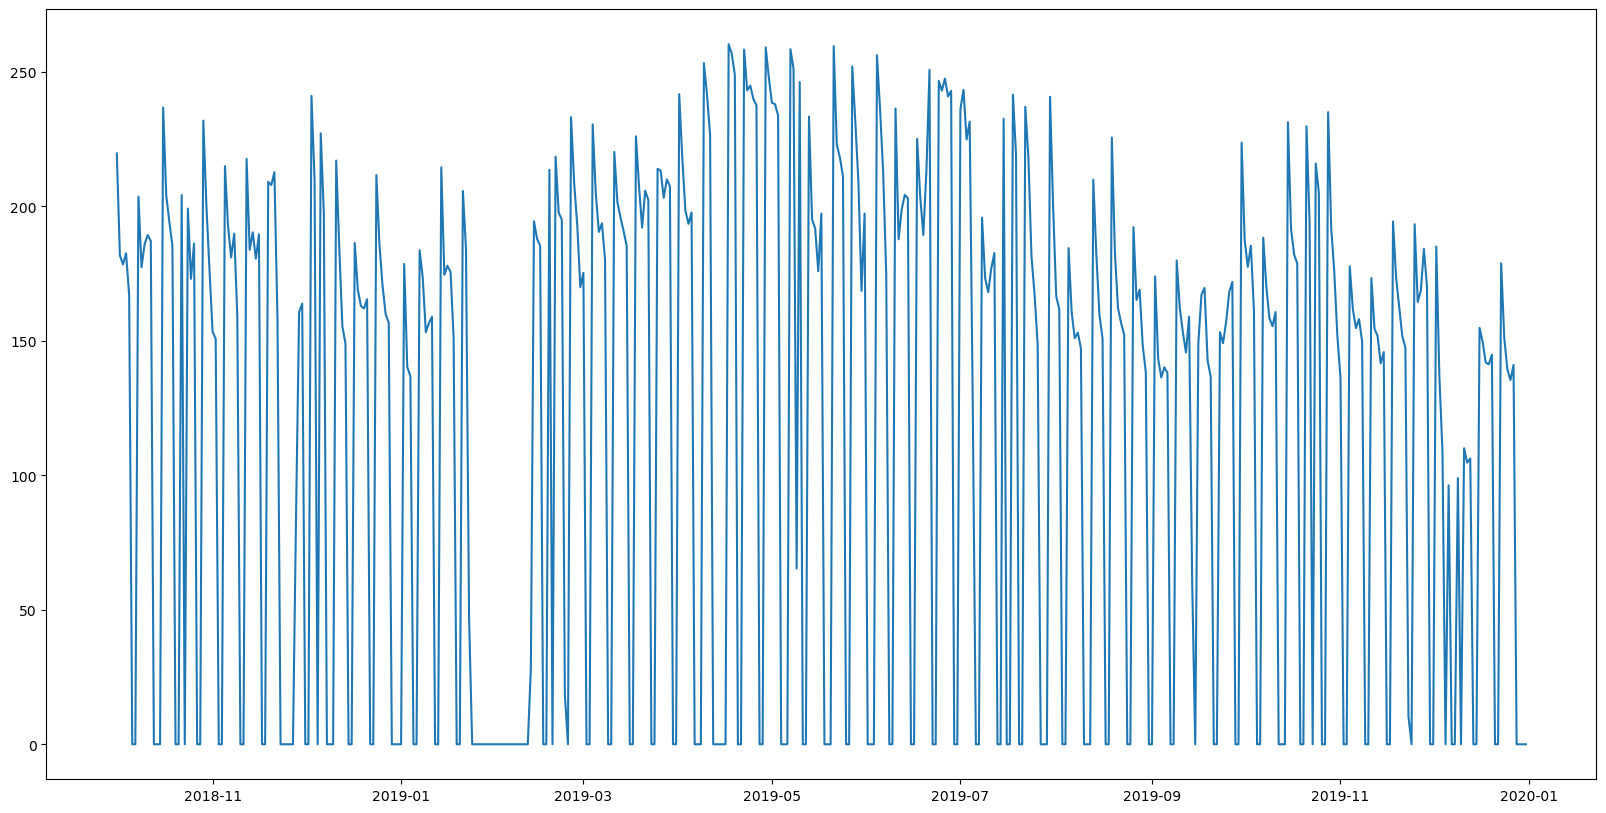

In [50]:
plt.figure(figsize=(20, 10))

plt.plot(df_test.index,df_test['y'])

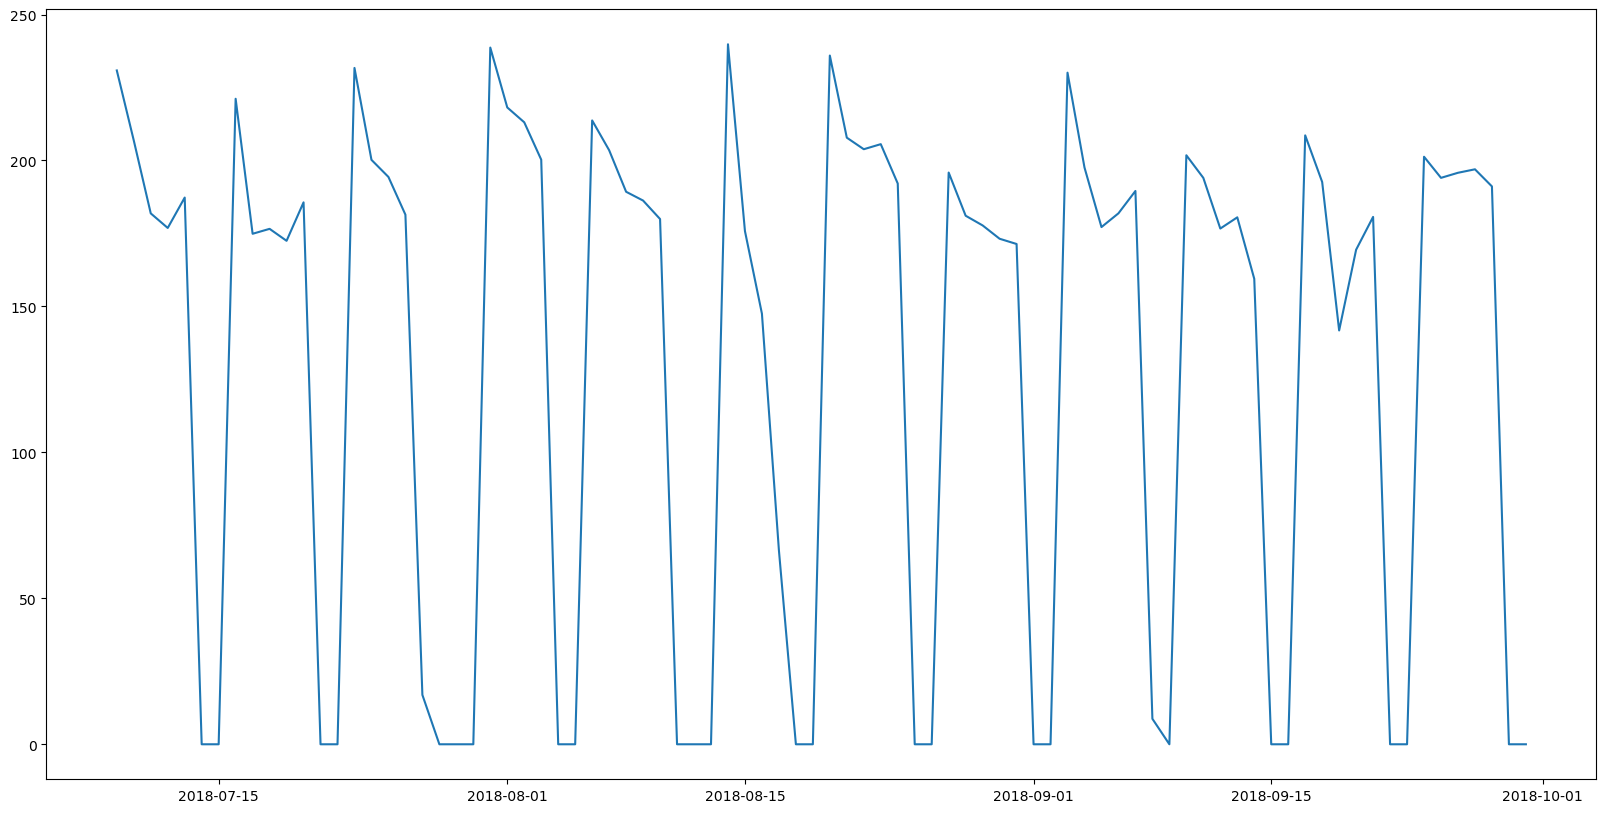

In [51]:
plt.figure(figsize=(20, 10))

plt.plot(df_train.index, df_train['y'])

# **Pelatihan dan Pengujian**

In [4]:
def apply_model(model, df_train, df_test):
    scaler = StandardScaler()
    df_train_scaled = scaler.fit_transform(df_train)
    df_test_scaled = scaler.transform(df_test)

    model.fit(df_train_scaled)
    pred = model.predict(df_test_scaled)
    anomalies = df_test[pred == 1]
    normal = df_test[pred == 0]
    score = model.decision_function(df_test_scaled)

    return model, pred, anomalies, normal, score, df_train_scaled, df_test_scaled

In [5]:
def plot(df_test, score, pred, threshold):

    #threshold = np.min(score[pred == 1])
    print(f"Total data: {len(df_test)}")
    print(f"Anomali: {len(df_test[pred==1])}")
    print(f"Normal: {len(df_test[pred==0])}")

    print("\nDaftar waktu point anomaly:")
    anomaly_times = df_test.index[pred == 1]
    for i, time in enumerate(anomaly_times, 1):
        print(f"  - Anomali {i}: {time.strftime('%Y-%m-%d %H:%M:%S')}")

    fig, axs = plt.subplots(2, 1, figsize=(14, 8))

    axs[0].plot(df_test.index, df_test['y'], color='blue', label='Original data')
    axs[0].scatter(df_test.index[pred==1], df_test.y[pred==1], color='red', label='Anomalies')
    axs[0].legend()
    axs[0].grid()

    axs[1].plot(df_test.index, score, color='blue', label='Anomaly Score')
    axs[1].axhline(y=threshold, color='green', linestyle='--', label=f'Threshold ({threshold:.3e})')
    axs[1].scatter(df_test.index[pred == 1], score[pred == 1], color='red', label='Anomalies')
    axs[1].set_title('Anomaly Score')
    axs[1].legend()
    axs[1].grid()

    plt.tight_layout()
    plt.show()


In [6]:
def get_collective_anomaly_ranges(preds, timestamps):
    ranges = []
    start = None
    for i, val in enumerate(preds):
        if val == 1 and start is None:
            start = timestamps[i]
        elif val == 0 and start is not None:
            #end = timestamps[i]: kalo mau "anomali berlangsung sampai data kembali normal"
            #end = timestamps[i-1]: kalo mau rangenya hanya mencakup data yang memang anomali
            end = timestamps[i]
            ranges.append((start, end))
            start = None
    if start is not None:
        ranges.append((start, timestamps[-1]))
    return ranges

def plot_collective(df_test, score, pred, threshold):
    print(f"Total data: {len(df_test)}")
    print(f"Anomali: {len(df_test[pred==1])}")
    print(f"Normal: {len(df_test[pred==0])}")

    fig, axs = plt.subplots(2, 1, figsize=(16, 8))

    axs[0].plot(df_test.index, df_test['y'], color='blue', label='Original Data')

    ranges = get_collective_anomaly_ranges(pred, df_test.index)
    print("\nDaftar kolektif anomali:")
    for i, (start, end) in enumerate(ranges, 1):
        print(f"  - Anomali {i}: {start.strftime('%Y-%m-%d %H:%M')} → {end.strftime('%Y-%m-%d %H:%M')}")
        axs[0].axvspan(start, end, color='red', alpha=0.3)  # Blok merah di data aslinya

    axs[0].set_title('Data')
    axs[0].legend()
    axs[0].grid()

    # Plot skor anomali
    axs[1].plot(df_test.index, score, color='blue', label='Anomaly Score')
    axs[1].axhline(y=threshold, color='green', linestyle='--', label=f'Threshold ({threshold:.3e})')
    axs[1].scatter(df_test.index[pred == 1], score[pred == 1], color='red', s=10, label='Anomaly Points')
    for start, end in ranges:
        axs[1].axvspan(start, end, color='red', alpha=0.3)
        
    axs[1].set_title('Anomaly Score')
    axs[1].legend()
    axs[1].grid()

    plt.tight_layout()
    plt.show()


## **Isolation Forest**

In [74]:
if_model, if_pred, if_anomalies, if_normal, if_score, train_scaled, test_scaled = apply_model(IForest(contamination=0.05, random_state=1), df_train, df_test)

Total data: 457
Anomali: 106
Normal: 351

Daftar waktu point anomaly:
  - Anomali 1: 2018-10-23 00:00:00
  - Anomali 2: 2018-11-26 00:00:00
  - Anomali 3: 2018-11-27 00:00:00
  - Anomali 4: 2018-11-28 00:00:00
  - Anomali 5: 2018-11-30 00:00:00
  - Anomali 6: 2018-12-02 00:00:00
  - Anomali 7: 2018-12-03 00:00:00
  - Anomali 8: 2018-12-05 00:00:00
  - Anomali 9: 2018-12-10 00:00:00
  - Anomali 10: 2018-12-31 00:00:00
  - Anomali 11: 2019-01-01 00:00:00
  - Anomali 12: 2019-01-06 00:00:00
  - Anomali 13: 2019-01-07 00:00:00
  - Anomali 14: 2019-01-24 00:00:00
  - Anomali 15: 2019-01-25 00:00:00
  - Anomali 16: 2019-01-28 00:00:00
  - Anomali 17: 2019-01-29 00:00:00
  - Anomali 18: 2019-01-30 00:00:00
  - Anomali 19: 2019-01-31 00:00:00
  - Anomali 20: 2019-02-01 00:00:00
  - Anomali 21: 2019-02-03 00:00:00
  - Anomali 22: 2019-02-04 00:00:00
  - Anomali 23: 2019-02-05 00:00:00
  - Anomali 24: 2019-02-06 00:00:00
  - Anomali 25: 2019-02-07 00:00:00
  - Anomali 26: 2019-02-08 00:00:00
  -

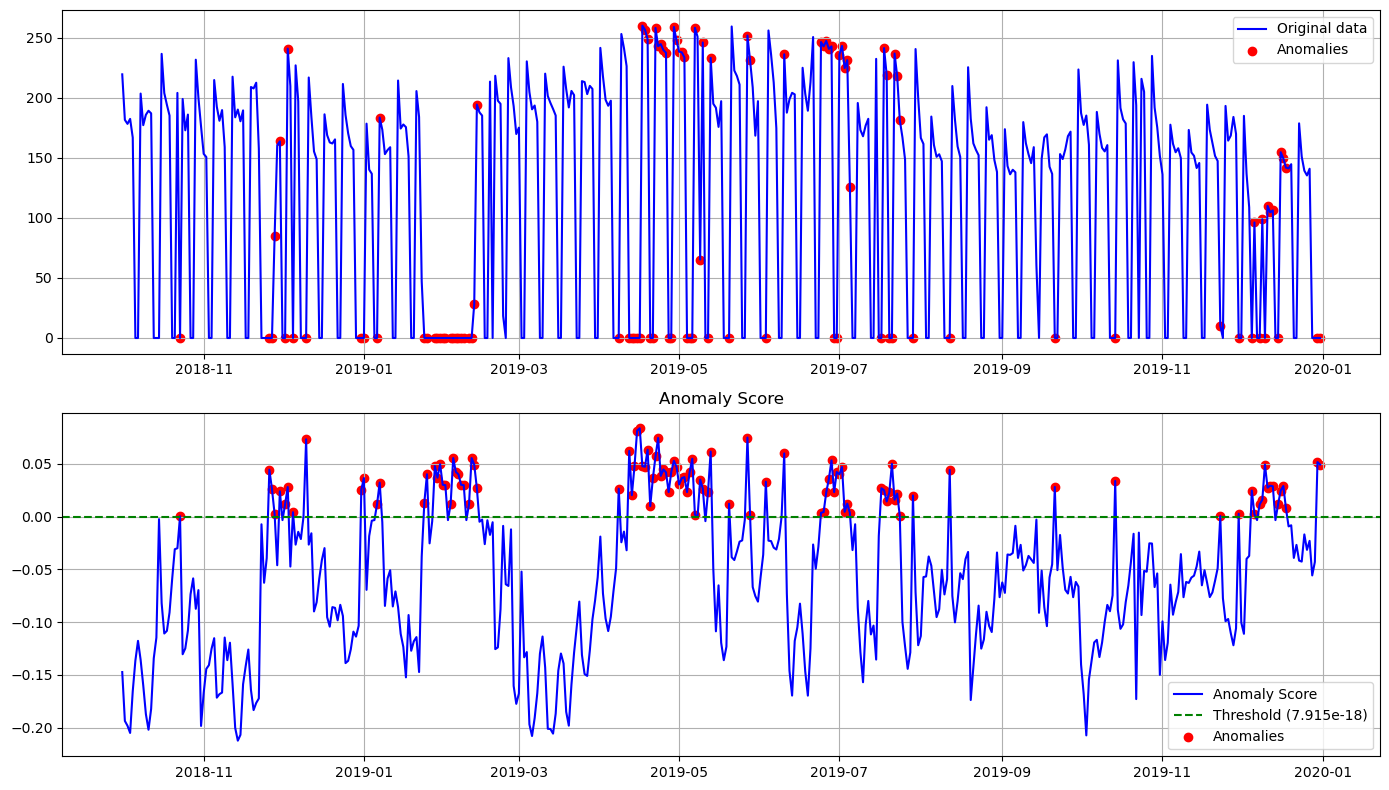

In [56]:
plot(df_test, if_score, if_pred, if_model.threshold_)

Total data: 457
Anomali: 106
Normal: 351

Daftar kolektif anomali:
  - Anomali 1: 2018-10-23 00:00 → 2018-10-24 00:00
  - Anomali 2: 2018-11-26 00:00 → 2018-11-29 00:00
  - Anomali 3: 2018-11-30 00:00 → 2018-12-01 00:00
  - Anomali 4: 2018-12-02 00:00 → 2018-12-04 00:00
  - Anomali 5: 2018-12-05 00:00 → 2018-12-06 00:00
  - Anomali 6: 2018-12-10 00:00 → 2018-12-11 00:00
  - Anomali 7: 2018-12-31 00:00 → 2019-01-02 00:00
  - Anomali 8: 2019-01-06 00:00 → 2019-01-08 00:00
  - Anomali 9: 2019-01-24 00:00 → 2019-01-26 00:00
  - Anomali 10: 2019-01-28 00:00 → 2019-02-02 00:00
  - Anomali 11: 2019-02-03 00:00 → 2019-02-09 00:00
  - Anomali 12: 2019-02-10 00:00 → 2019-02-14 00:00
  - Anomali 13: 2019-04-08 00:00 → 2019-04-09 00:00
  - Anomali 14: 2019-04-12 00:00 → 2019-05-08 00:00
  - Anomali 15: 2019-05-09 00:00 → 2019-05-11 00:00
  - Anomali 16: 2019-05-12 00:00 → 2019-05-14 00:00
  - Anomali 17: 2019-05-20 00:00 → 2019-05-21 00:00
  - Anomali 18: 2019-05-27 00:00 → 2019-05-29 00:00
  - An

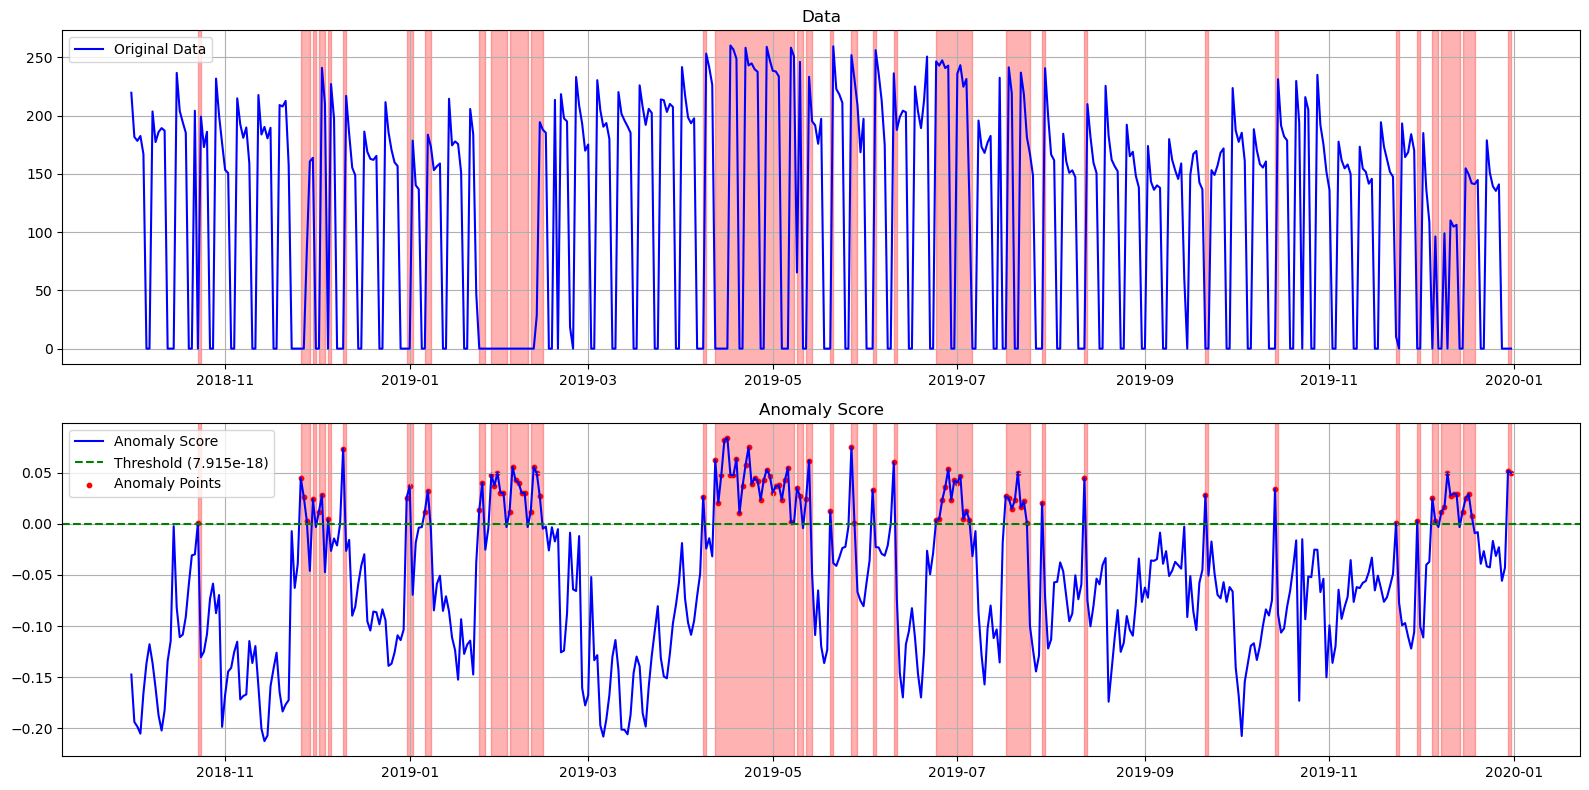

In [58]:
plot_collective(df_test, if_score, if_pred, if_model.threshold_)

## **LOF**

In [75]:
lof_model, lof_pred, lof_anomalies, lof_normal, lof_score, train_scaled, test_scaled = apply_model(LOF(contamination=0.01, novelty=True), df_train, df_test)

In [ ]:
plot(df_train, lof_model.decision_scores_, lof_model.labels_, lof_model.threshold_)

In [ ]:
plot(df_test, lof_score, lof_pred, lof_model.threshold_)

Total data: 10968
Anomali: 308
Normal: 10660

Daftar kolektif anomali:
  - Anomali 1: 2018-10-06 16:00 → 2018-10-06 17:00
  - Anomali 2: 2018-10-13 16:00 → 2018-10-13 17:00
  - Anomali 3: 2018-10-20 16:00 → 2018-10-20 17:00
  - Anomali 4: 2018-10-24 00:00 → 2018-10-24 01:00
  - Anomali 5: 2018-11-03 16:00 → 2018-11-03 17:00
  - Anomali 6: 2018-11-10 16:00 → 2018-11-10 17:00
  - Anomali 7: 2018-11-24 00:00 → 2018-11-24 14:00
  - Anomali 8: 2018-11-28 00:00 → 2018-11-28 01:00
  - Anomali 9: 2018-11-29 00:00 → 2018-11-29 03:00
  - Anomali 10: 2018-12-06 00:00 → 2018-12-06 07:00
  - Anomali 11: 2018-12-08 16:00 → 2018-12-08 17:00
  - Anomali 12: 2019-01-02 00:00 → 2019-01-02 01:00
  - Anomali 13: 2019-01-02 16:00 → 2019-01-02 17:00
  - Anomali 14: 2019-01-12 16:00 → 2019-01-12 17:00
  - Anomali 15: 2019-01-19 16:00 → 2019-01-19 17:00
  - Anomali 16: 2019-01-24 00:00 → 2019-01-24 03:00
  - Anomali 17: 2019-01-24 09:00 → 2019-01-24 10:00
  - Anomali 18: 2019-01-25 00:00 → 2019-01-25 08:00
  

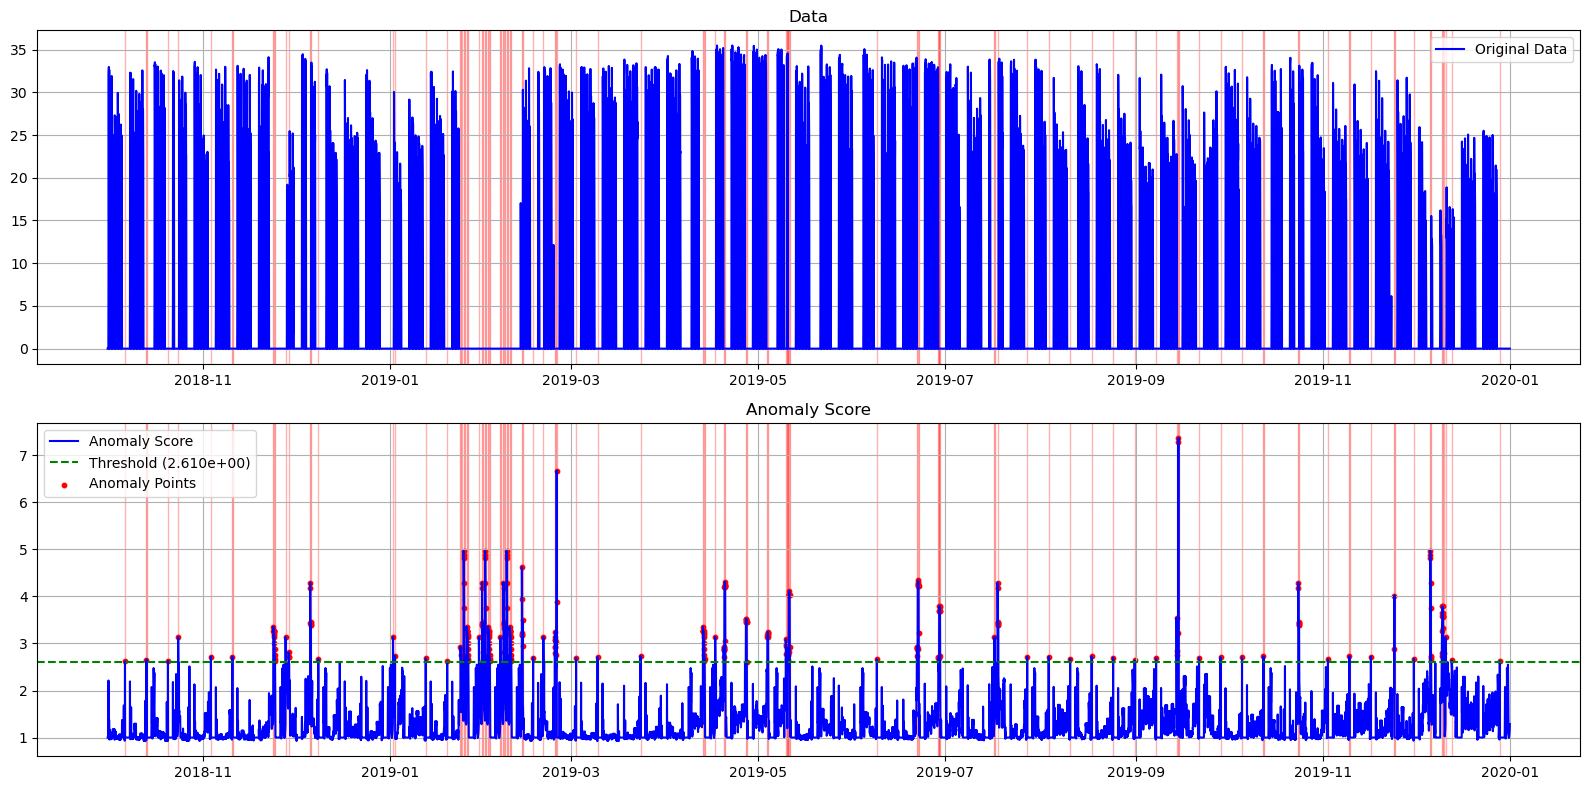

In [393]:
plot_collective(df_test, lof_score, lof_pred, lof_model.threshold_)

## **AutoEncoder**

In [76]:
ae_model, ae_pred, ae_anomalies, ae_normal, ae_score, train_scaled, test_scaled = apply_model(AutoEncoder(contamination = 0.01), df_train, df_test)

Training: 100%|███████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 129.63it/s]


In [ ]:
plot(df_train, ae_model.decision_scores_, ae_model.labels_, ae_model.threshold_)

Total data: 457
Anomali: 144
Normal: 313

Daftar waktu point anomaly:
  - Anomali 1: 2018-11-27 00:00:00
  - Anomali 2: 2018-11-28 00:00:00
  - Anomali 3: 2018-11-29 00:00:00
  - Anomali 4: 2018-11-30 00:00:00
  - Anomali 5: 2018-12-01 00:00:00
  - Anomali 6: 2018-12-02 00:00:00
  - Anomali 7: 2018-12-09 00:00:00
  - Anomali 8: 2018-12-22 00:00:00
  - Anomali 9: 2018-12-23 00:00:00
  - Anomali 10: 2019-01-01 00:00:00
  - Anomali 11: 2019-01-04 00:00:00
  - Anomali 12: 2019-01-05 00:00:00
  - Anomali 13: 2019-01-06 00:00:00
  - Anomali 14: 2019-01-07 00:00:00
  - Anomali 15: 2019-01-12 00:00:00
  - Anomali 16: 2019-01-13 00:00:00
  - Anomali 17: 2019-01-26 00:00:00
  - Anomali 18: 2019-01-27 00:00:00
  - Anomali 19: 2019-01-28 00:00:00
  - Anomali 20: 2019-01-29 00:00:00
  - Anomali 21: 2019-01-30 00:00:00
  - Anomali 22: 2019-01-31 00:00:00
  - Anomali 23: 2019-02-01 00:00:00
  - Anomali 24: 2019-02-02 00:00:00
  - Anomali 25: 2019-02-03 00:00:00
  - Anomali 26: 2019-02-04 00:00:00
  -

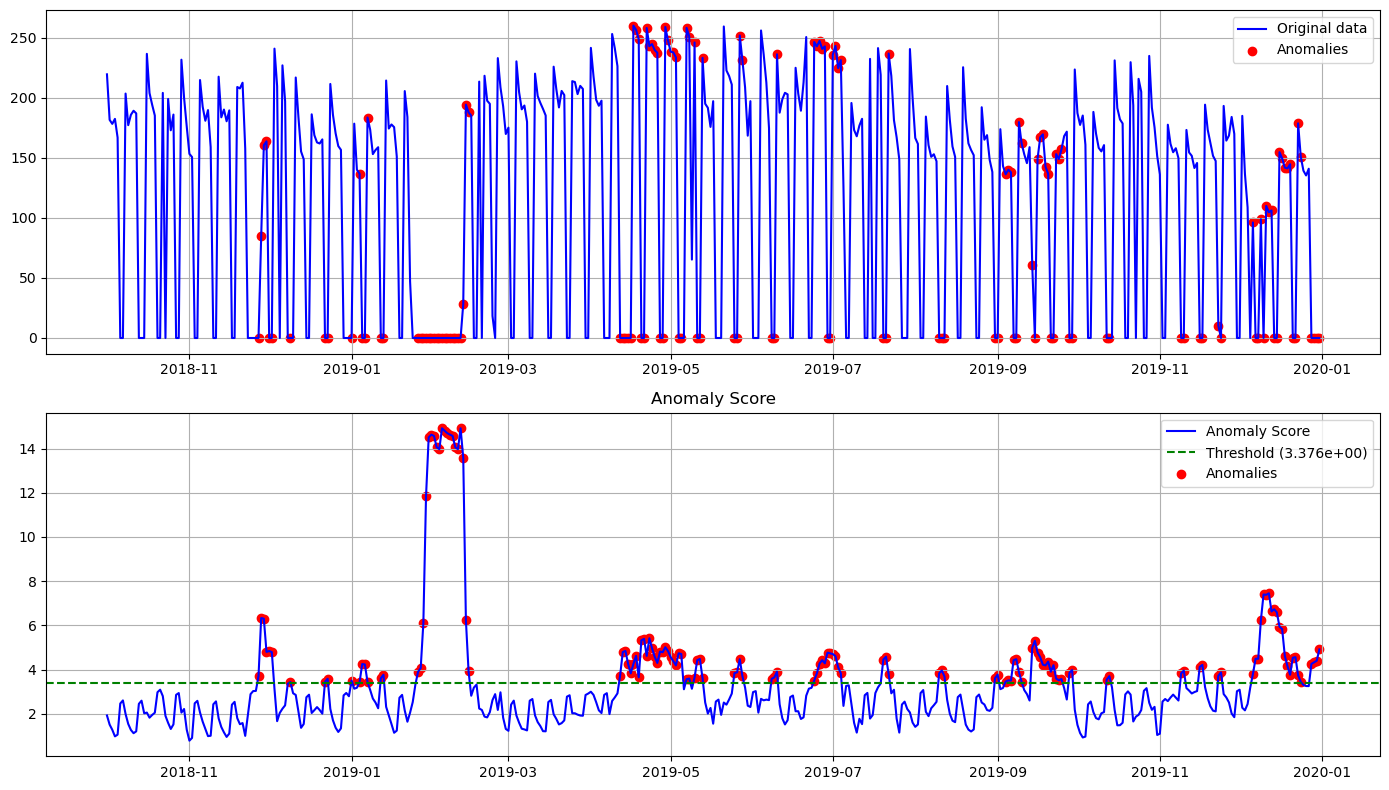

In [17]:
plot(df_test, ae_score, ae_pred, ae_model.threshold_)

Total data: 10968
Anomali: 359
Normal: 10609

Daftar kolektif anomali:
  - Anomali 1: 2018-10-15 23:00 → 2018-10-16 00:00
  - Anomali 2: 2018-10-23 08:00 → 2018-10-23 12:00
  - Anomali 3: 2018-10-23 13:00 → 2018-10-23 16:00
  - Anomali 4: 2018-10-23 23:00 → 2018-10-24 00:00
  - Anomali 5: 2018-11-22 14:00 → 2018-11-22 16:00
  - Anomali 6: 2018-11-23 08:00 → 2018-11-23 12:00
  - Anomali 7: 2018-11-23 13:00 → 2018-11-24 00:00
  - Anomali 8: 2018-11-26 23:00 → 2018-11-27 00:00
  - Anomali 9: 2018-11-27 23:00 → 2018-11-28 00:00
  - Anomali 10: 2018-12-04 11:00 → 2018-12-04 12:00
  - Anomali 11: 2018-12-05 08:00 → 2018-12-05 12:00
  - Anomali 12: 2018-12-05 13:00 → 2018-12-05 17:00
  - Anomali 13: 2018-12-05 22:00 → 2018-12-06 00:00
  - Anomali 14: 2018-12-06 08:00 → 2018-12-06 11:00
  - Anomali 15: 2018-12-06 13:00 → 2018-12-06 16:00
  - Anomali 16: 2018-12-10 23:00 → 2018-12-11 00:00
  - Anomali 17: 2018-12-31 23:00 → 2019-01-01 00:00
  - Anomali 18: 2019-01-01 23:00 → 2019-01-02 00:00
  

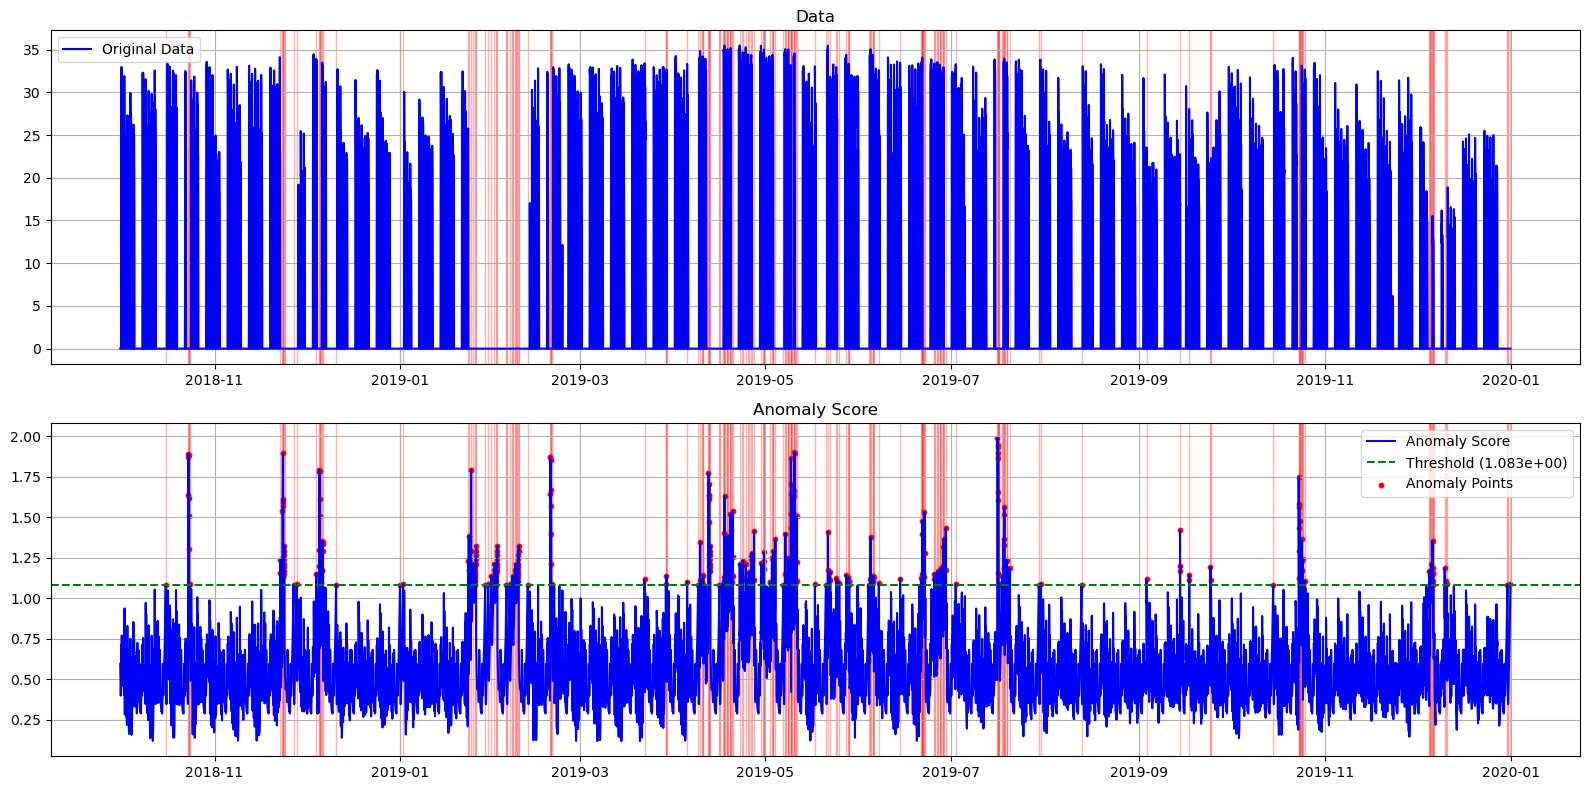

In [396]:
plot_collective(df_test, ae_score, ae_pred, ae_model.threshold_)

In [173]:
joblib.dump(ae_model, 'ae_model.pkl')

['ae_model.pkl']

## **OneClassSVM**

In [77]:
ocsvm_model, ocsvm_pred, ocsvm_anomalies, ocsvm_normal, ocsvm_score, train_scaled, test_scaled = apply_model(OCSVM(contamination=0.01), df_train, df_test)

In [ ]:
plot(df_train, ocsvm_model.decision_scores_, ocsvm_model.labels_, ocsvm_model.threshold_)

Total data: 457
Anomali: 162
Normal: 295

Daftar waktu point anomaly:
  - Anomali 1: 2018-11-26 00:00:00
  - Anomali 2: 2018-11-27 00:00:00
  - Anomali 3: 2018-11-28 00:00:00
  - Anomali 4: 2018-11-29 00:00:00
  - Anomali 5: 2018-11-30 00:00:00
  - Anomali 6: 2018-12-01 00:00:00
  - Anomali 7: 2018-12-02 00:00:00
  - Anomali 8: 2018-12-03 00:00:00
  - Anomali 9: 2018-12-10 00:00:00
  - Anomali 10: 2018-12-31 00:00:00
  - Anomali 11: 2019-01-01 00:00:00
  - Anomali 12: 2019-01-02 00:00:00
  - Anomali 13: 2019-01-03 00:00:00
  - Anomali 14: 2019-01-04 00:00:00
  - Anomali 15: 2019-01-05 00:00:00
  - Anomali 16: 2019-01-06 00:00:00
  - Anomali 17: 2019-01-07 00:00:00
  - Anomali 18: 2019-01-08 00:00:00
  - Anomali 19: 2019-01-24 00:00:00
  - Anomali 20: 2019-01-25 00:00:00
  - Anomali 21: 2019-01-26 00:00:00
  - Anomali 22: 2019-01-27 00:00:00
  - Anomali 23: 2019-01-28 00:00:00
  - Anomali 24: 2019-01-29 00:00:00
  - Anomali 25: 2019-01-30 00:00:00
  - Anomali 26: 2019-01-31 00:00:00
  -

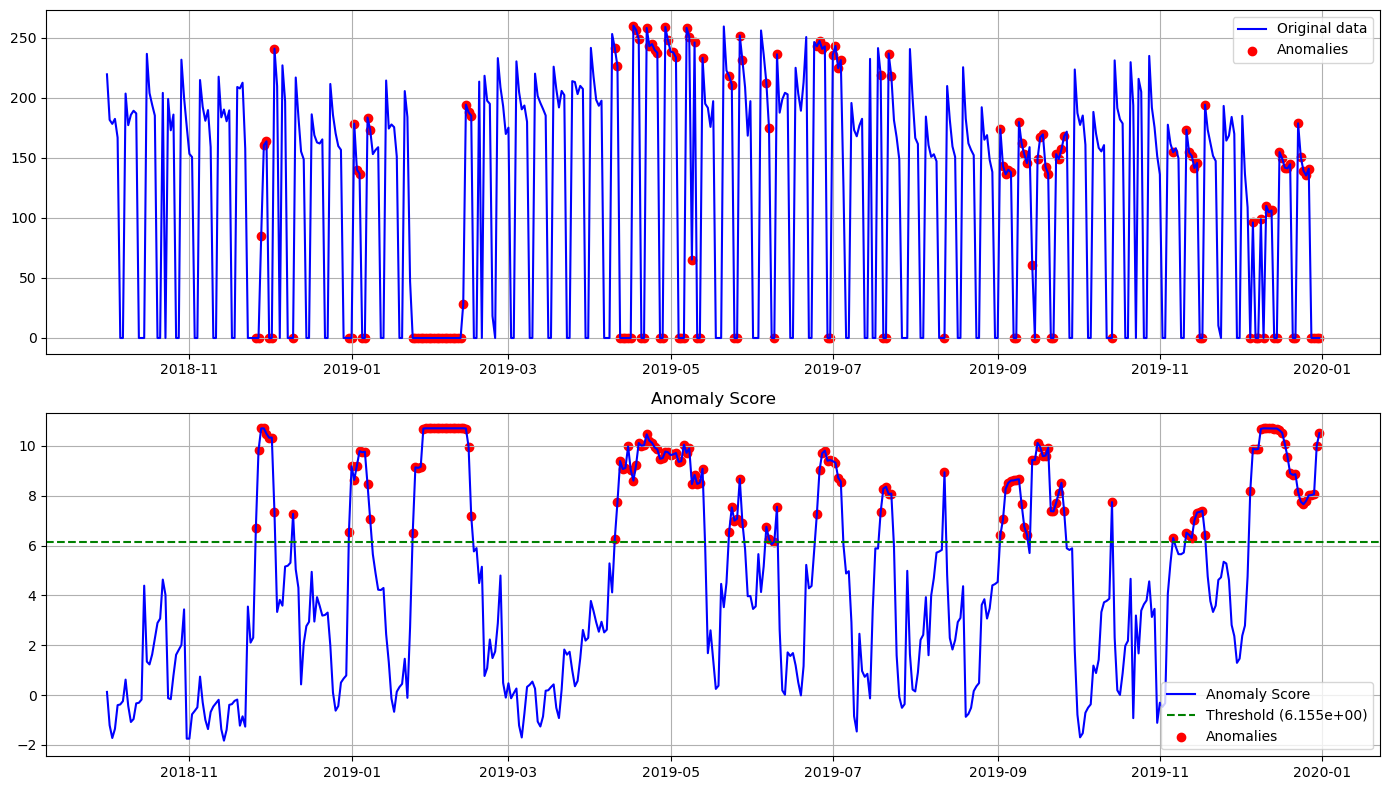

In [19]:
plot(df_test, ocsvm_score, ocsvm_pred, ocsvm_model.threshold_)

Total data: 10968
Anomali: 191
Normal: 10777

Daftar kolektif anomali:
  - Anomali 1: 2018-10-01 08:00 → 2018-10-01 09:00
  - Anomali 2: 2018-10-08 08:00 → 2018-10-08 09:00
  - Anomali 3: 2018-10-13 08:00 → 2018-10-13 09:00
  - Anomali 4: 2018-10-15 23:00 → 2018-10-16 00:00
  - Anomali 5: 2018-10-16 08:00 → 2018-10-16 09:00
  - Anomali 6: 2018-10-20 08:00 → 2018-10-20 09:00
  - Anomali 7: 2018-10-22 08:00 → 2018-10-22 09:00
  - Anomali 8: 2018-10-23 08:00 → 2018-10-23 10:00
  - Anomali 9: 2018-10-23 13:00 → 2018-10-23 14:00
  - Anomali 10: 2018-10-23 15:00 → 2018-10-23 16:00
  - Anomali 11: 2018-10-27 08:00 → 2018-10-27 09:00
  - Anomali 12: 2018-10-29 08:00 → 2018-10-29 09:00
  - Anomali 13: 2018-11-05 08:00 → 2018-11-05 09:00
  - Anomali 14: 2018-11-12 08:00 → 2018-11-12 09:00
  - Anomali 15: 2018-11-17 08:00 → 2018-11-17 09:00
  - Anomali 16: 2018-11-19 08:00 → 2018-11-19 09:00
  - Anomali 17: 2018-11-23 11:00 → 2018-11-23 12:00
  - Anomali 18: 2018-11-26 23:00 → 2018-11-27 00:00
  

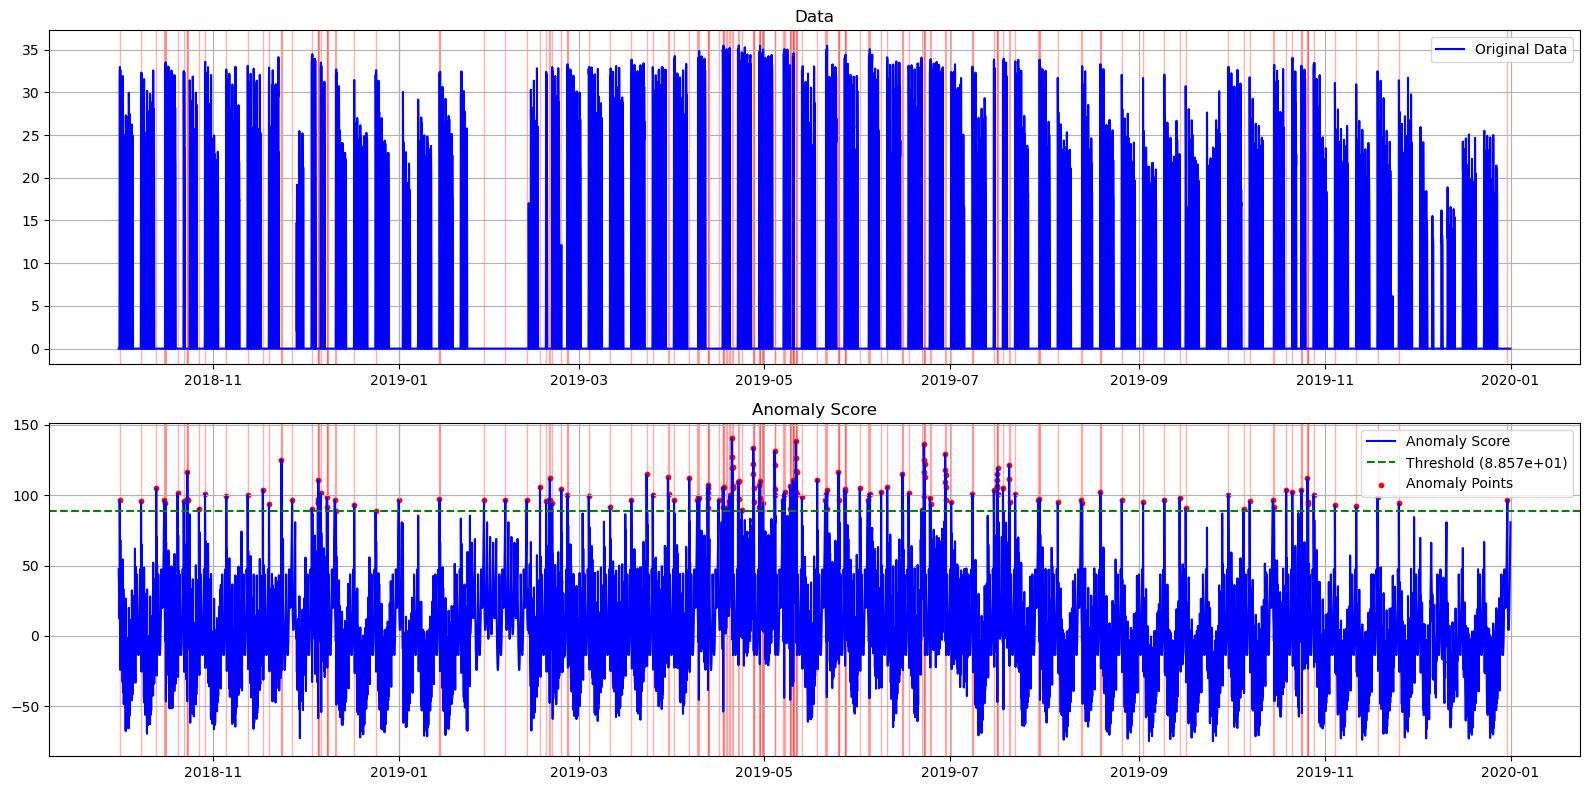

In [400]:
plot_collective(df_test, ocsvm_score, ocsvm_pred, ocsvm_model.threshold_)

## **KNN**

In [78]:
knn_model, knn_pred, knn_anomalies, knn_normal, knn_score, train_scaled, test_scaled = apply_model(KNN(contamination=0.01), df_train, df_test)

Total data: 457
Anomali: 127
Normal: 330

Daftar waktu point anomaly:
  - Anomali 1: 2018-11-27 00:00:00
  - Anomali 2: 2018-11-28 00:00:00
  - Anomali 3: 2018-11-29 00:00:00
  - Anomali 4: 2018-11-30 00:00:00
  - Anomali 5: 2018-12-01 00:00:00
  - Anomali 6: 2018-12-02 00:00:00
  - Anomali 7: 2018-12-03 00:00:00
  - Anomali 8: 2018-12-31 00:00:00
  - Anomali 9: 2019-01-01 00:00:00
  - Anomali 10: 2019-01-02 00:00:00
  - Anomali 11: 2019-01-03 00:00:00
  - Anomali 12: 2019-01-04 00:00:00
  - Anomali 13: 2019-01-05 00:00:00
  - Anomali 14: 2019-01-06 00:00:00
  - Anomali 15: 2019-01-07 00:00:00
  - Anomali 16: 2019-01-24 00:00:00
  - Anomali 17: 2019-01-25 00:00:00
  - Anomali 18: 2019-01-26 00:00:00
  - Anomali 19: 2019-01-27 00:00:00
  - Anomali 20: 2019-01-28 00:00:00
  - Anomali 21: 2019-01-29 00:00:00
  - Anomali 22: 2019-01-30 00:00:00
  - Anomali 23: 2019-01-31 00:00:00
  - Anomali 24: 2019-02-01 00:00:00
  - Anomali 25: 2019-02-02 00:00:00
  - Anomali 26: 2019-02-03 00:00:00
  -

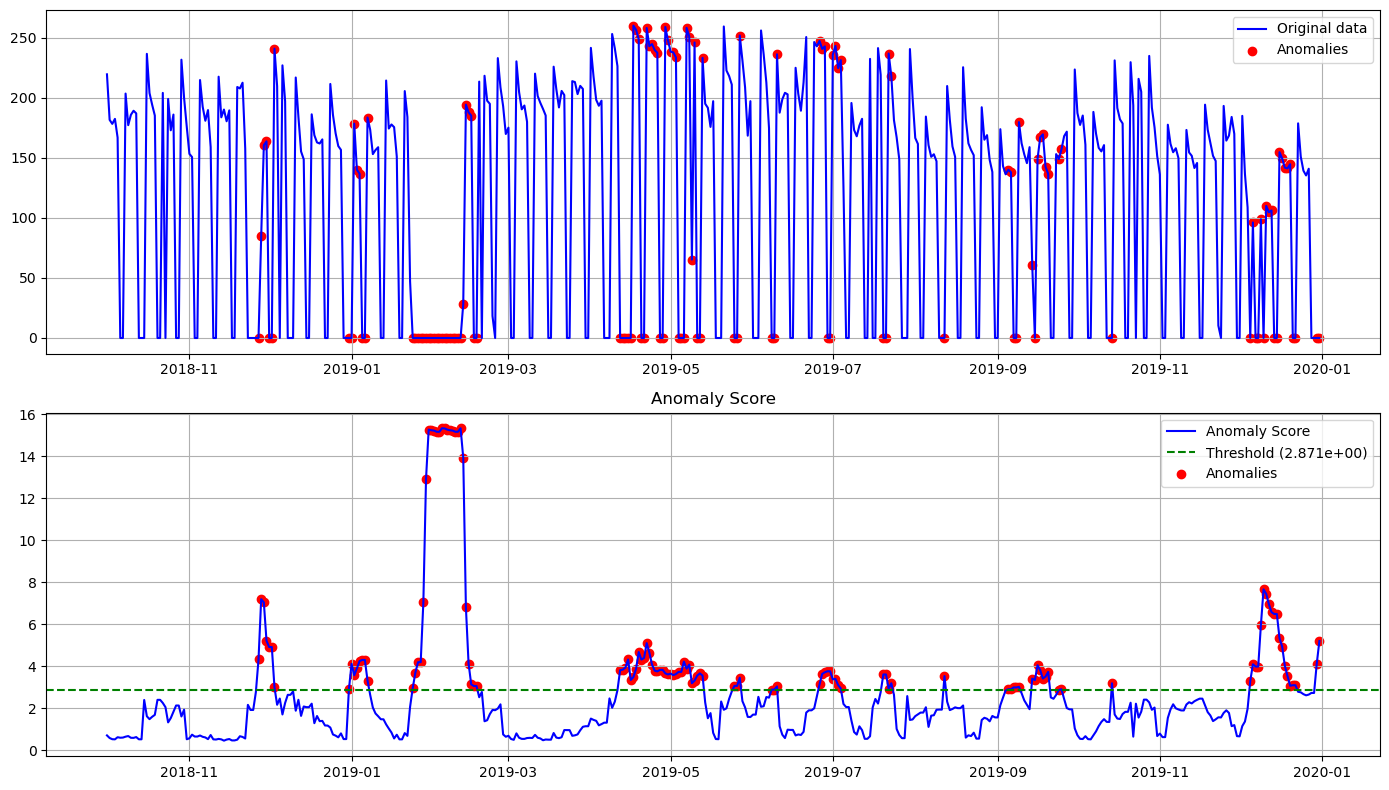

In [12]:
plot(df_test, knn_score, knn_pred, knn_model.threshold_)

In [448]:
import joblib
joblib.dump(knn_model, 'knn_model.pkl')

['knn_model.pkl']

In [ ]:
plot(df_train, knn_model.decision_scores_, knn_model.labels_, knn_model.threshold_)

In [203]:
mask = (df_test.index >= "2019-05-22") & (df_test.index <= "2019-05-23")
knn_score[mask]

array([0.42243861, 0.34764882, 0.34764882, 0.34764882, 0.34764882,
       0.34764882, 0.42243861, 0.70413572, 0.64089323, 0.62063708,
       0.59899556, 0.71709476, 0.59841092, 0.58804705, 0.63200242,
       0.64253909, 0.80689767, 0.30933193, 0.30082842, 0.30082842,
       0.30082842, 0.30082842, 0.30082842, 0.30933193, 0.30933193])

In [279]:
mask = (df_test.index == "2019-05-22 03") & (df_test.index <= "2019-05-23")
knn_score

array([0.42243861, 0.34764882, 0.34764882, 0.34764882, 0.34764882,
       0.34764882, 0.42243861, 0.70413572, 0.64089323, 0.62063708,
       0.59899556, 0.71709476, 0.59841092, 0.58804705, 0.63200242,
       0.64253909, 0.80689767, 0.30933193, 0.30082842, 0.30082842,
       0.30082842, 0.30082842, 0.30082842, 0.30933193, 0.30933193,
       0.30082842, 0.30082842, 0.30082842, 0.30082842, 0.30082842,
       0.30933193, 0.55729954, 0.37617003, 0.40270389, 0.50325488,
       0.61024993, 0.50552399, 0.57434283, 0.58316738, 0.479463  ,
       0.6257472 , 0.29976566, 0.24287524, 0.24287524, 0.24287524,
       0.24287524, 0.24287524, 0.29976566])

In [425]:
test_scaled

array([[-0.5304121 , -0.5304121 , -1.2279357 , -0.5       , -0.63245553,
         1.46439291,  1.36842894],
       [-0.5304121 , -0.5304121 , -1.08347268, -0.5       , -0.63245553,
         1.46439291,  1.36842894]])

In [275]:
plot(df_test[mask], knn_score[mask], knn_pred[mask], knn_model.threshold_)

ValueError: Item wrong length 10968 instead of 48.

Total data: 2
Anomali: 0
Normal: 2

Daftar kolektif anomali:


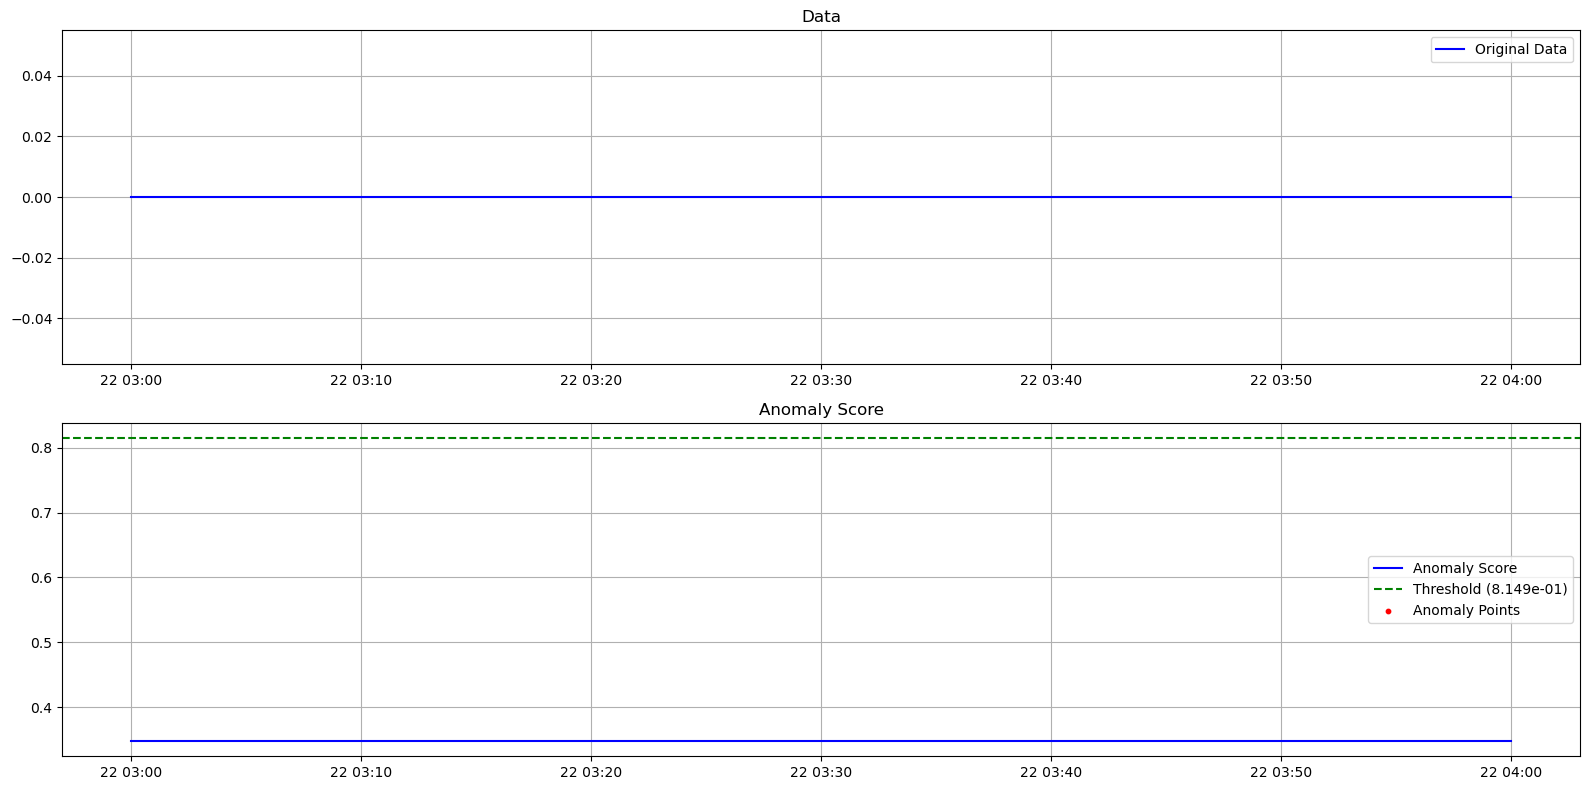

In [423]:
plot_collective(df_test, knn_score, knn_pred, knn_model.threshold_)

# **EMMV**

In [48]:
averaging = 50
max_features = 8
n_generated = 100000
alpha_min = 0.05
alpha_max = 0.999
t_max = 0.9


In [49]:
# hitung exess mass
def em(t, t_max, volume_support, s_unif, s_X, n_generated):
    # inisialisasi array untuk simpan nilai em
    EM_t = np.zeros(t.shape[0]) 
    # jumlah data dalam data test
    n_samples = s_X.shape[0]
    # nilai unik dari skor anomali data test
    s_X_unique = np.unique(s_X)
    EM_t[0] = 1.
    for u in s_X_unique:
        # hitung excess mass dengan mengurangi massa aktual dan massa uniform yang dikali penalti (t)
        EM_t = np.maximum(EM_t, 1. / n_samples * (s_X > u).sum() -
                          t * (s_unif > u).sum() / n_generated * volume_support)
    amax = np.argmax(EM_t <= t_max) + 1
    if amax == 1:
        print('\nFailed to achieve t_max\n')
        amax = -1
    AUC = auc(t[:amax], EM_t[:amax])
    return AUC, EM_t, amax

# hitung mass volume
def mv(axis_alpha, volume_support, s_unif, s_X, n_generated):
    # jumlah data dalam data test
    n_samples = s_X.shape[0]
    # skor anomalinya diurutin dari kecil ke besar
    s_X_argsort = s_X.argsort()
    mass = 0
    cpt = 0
    # ambang batas awal diambil skor anomali yang terbesar
    u = s_X[s_X_argsort[-1]]
    # inisialisasi array untuk simpan nilai mv
    mv = np.zeros(axis_alpha.shape[0])
    for i in range(axis_alpha.shape[0]):
        while mass < axis_alpha[i]:
            cpt += 1
            u = s_X[s_X_argsort[-cpt]]
            mass = 1. / n_samples * cpt
        # hitung volume berdasarkan proporsi data uniform yang lebih dari sm dengan ambang (u)
        mv[i] = float((s_unif >= u).sum()) / n_generated * volume_support
    return auc(axis_alpha, mv), mv

def compute_em_mv(model, df_train_scaled, df_test_scaled, score, n_generated, alpha_min, alpha_max, t_max):
    n_samples, n_features = df_test_scaled.shape

    X_train_ = df_train_scaled
    X_ = df_test_scaled
    # skor anomali data test, dikasi min soalnya kebalikan dengan scikit learn
    s_X = -score  
    
    # nilai min setiap fitur dari data test
    lim_inf = X_.min(axis=0)
    # nilai maks setiap fitur dari data test
    lim_sup = X_.max(axis=0)
    #hitung volume support dengan mengalikan seluruh selisih nilai maks dan min setiap fitur
    volume_support = (lim_sup - lim_inf).prod()
    # array skala pinalti untuk menentukan seberapa ketat mendeteksi anomali
    t = np.arange(0, 100 / volume_support, 0.001 / volume_support)
    # array proporsi massa untuk mv
    axis_alpha = np.arange(alpha_min, alpha_max, 0.001)
    # buat data acak uniform dalam rentang fitur pengujian
    unif = np.random.uniform(lim_inf, lim_sup, size=(n_generated, n_features))
    s_unif = -model.decision_function(unif)

    em_auc, em_t, amax = em(t, t_max, volume_support, s_unif, s_X, n_generated)
    mv_auc, mv_curve = mv(axis_alpha, volume_support, s_unif, s_X, n_generated)

    plt.figure(figsize=(12, 5))
    plt.subplot(121)
    plt.plot(t[:amax], em_t[:amax], label=f'em_score = {em_auc:.3e}')
    plt.ylim([-0.05, 1.05])
    plt.xlabel('t')
    plt.ylabel('EM(t)')
    plt.title('Excess-Mass Curve')
    plt.legend(loc="lower right")
    plt.grid()
    
    plt.subplot(122)
    plt.plot(axis_alpha, mv_curve, label=f'mv_score = {mv_auc:.3e}')
    plt.xlabel('alpha')
    plt.ylabel('MV(alpha)')
    plt.title('Mass-Volume Curve')
    plt.legend(loc="upper left")

    plt.grid()
    plt.tight_layout()
    plt.show()
    return em_auc, mv_auc

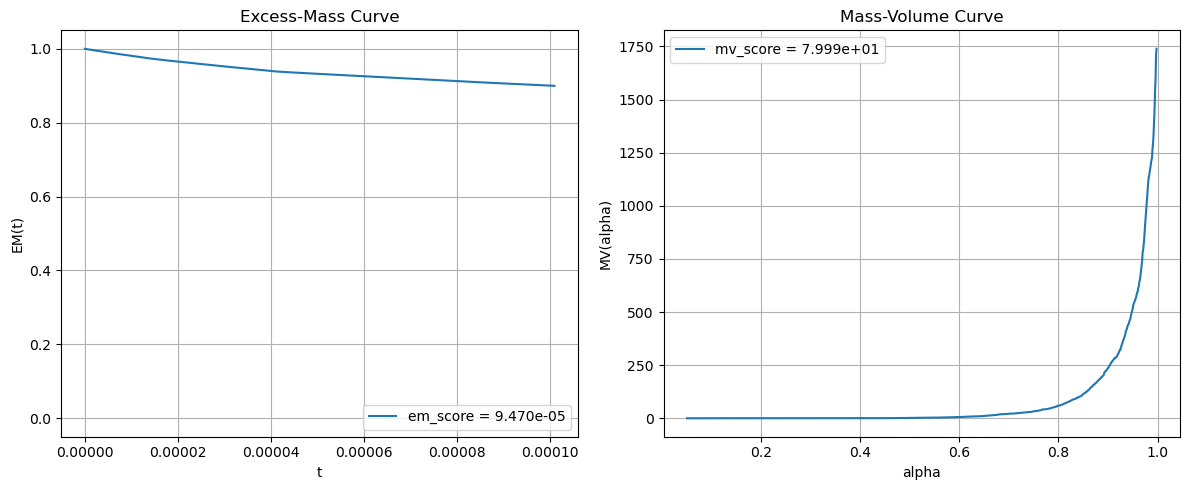

EM: 9.4704e-05, MV: 7.9995e+01


In [50]:
em_value_if, mv_value_if = compute_em_mv(if_model, train_scaled, test_scaled, if_score, n_generated, alpha_min, alpha_max, t_max)
print(f"EM: {em_value_if:.4e}, MV: {mv_value_if:.4e}")

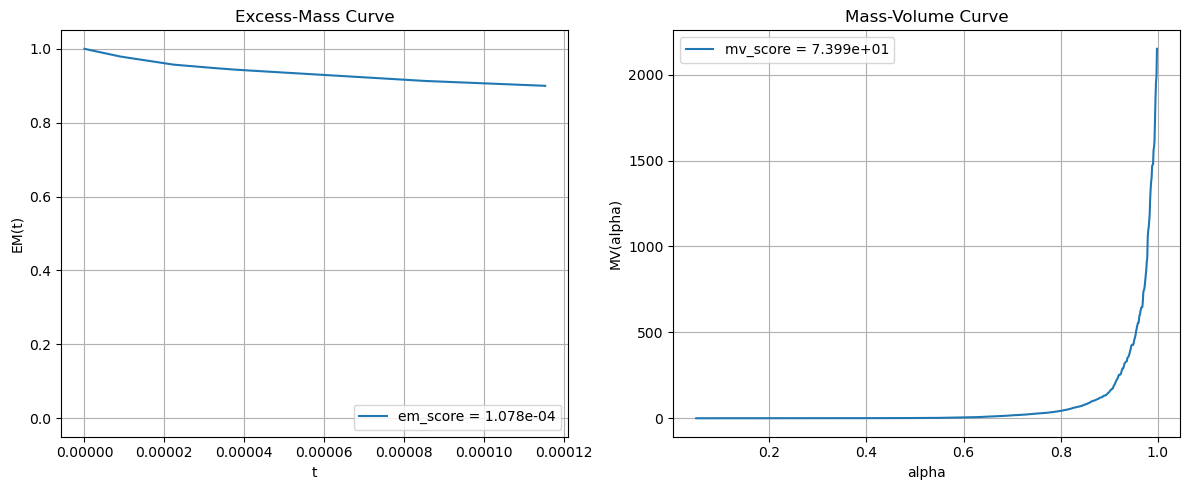

EM: 1.0781e-04, MV: 7.3993e+01


In [51]:
em_value_lof, mv_value_lof = compute_em_mv(lof_model, train_scaled, test_scaled, lof_score, n_generated, alpha_min, alpha_max, t_max)
print(f"EM: {em_value_lof:.4e}, MV: {mv_value_lof:.4e}")

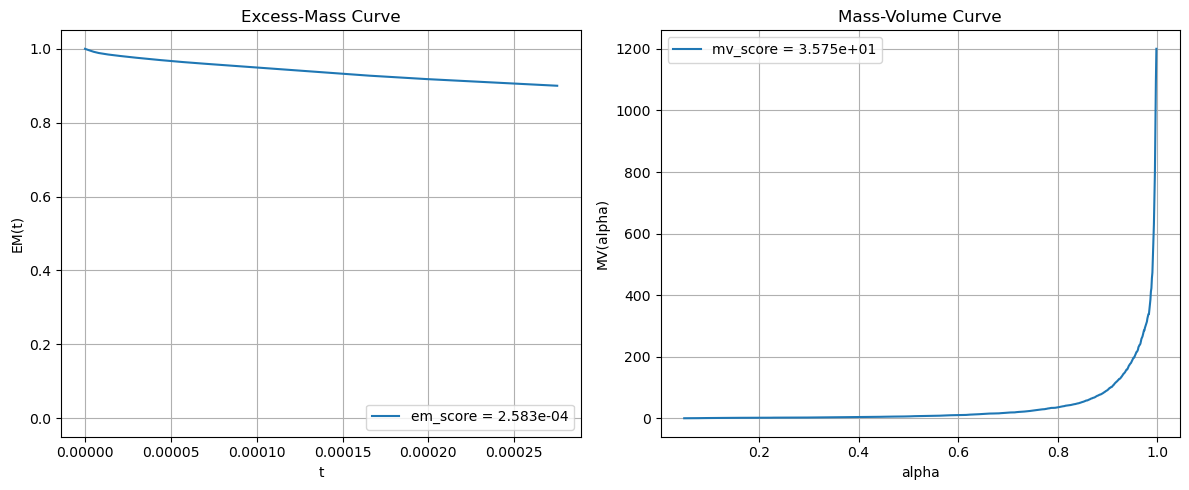

EM: 2.5831e-04, MV: 3.5750e+01


In [52]:
em_value_ae, mv_value_ae = compute_em_mv(ae_model, train_scaled, test_scaled, ae_score, n_generated, alpha_min, alpha_max, t_max)
print(f"EM: {em_value_ae:.4e}, MV: {mv_value_ae:.4e}")

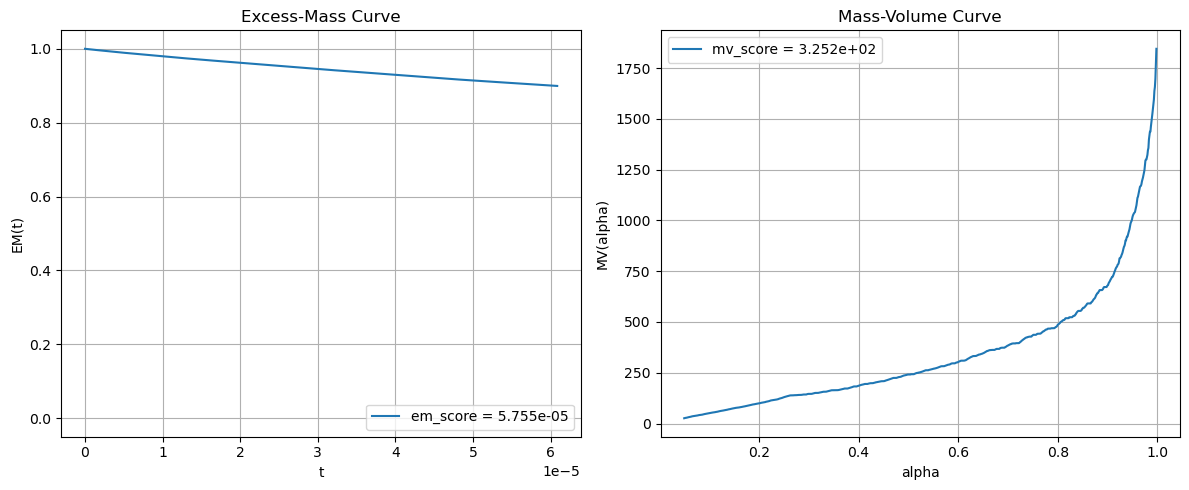

EM: 5.7553e-05, MV: 3.2521e+02


In [53]:
em_value_ocsvm, mv_value_ocsvm = compute_em_mv(ocsvm_model, train_scaled, test_scaled, ocsvm_score, n_generated, alpha_min, alpha_max, t_max)
print(f"EM: {em_value_ocsvm:.4e}, MV: {mv_value_ocsvm:.4e}")

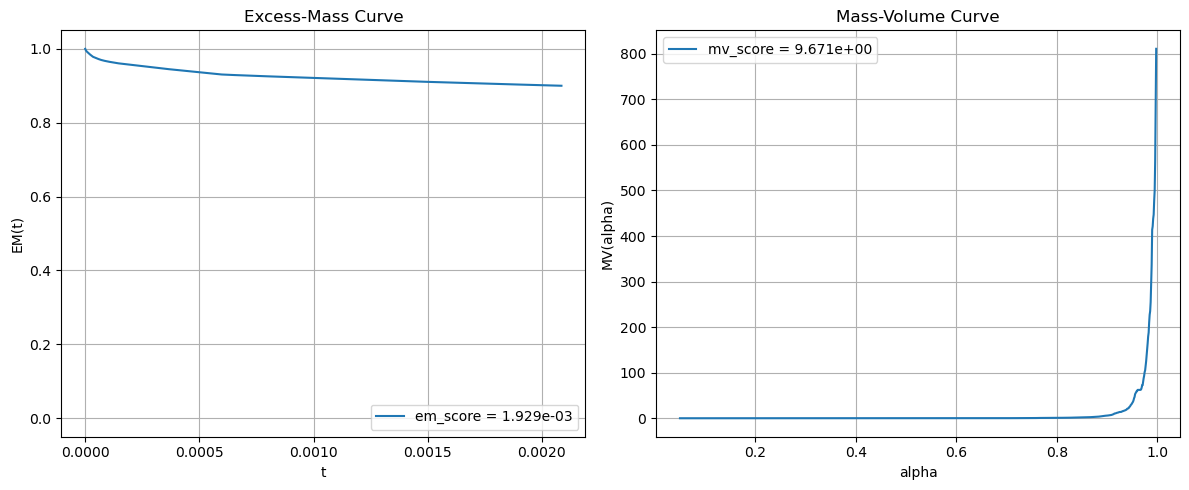

EM: 1.9287e-03, MV: 9.6714e+00


In [54]:
em_value_knn, mv_value_knn = compute_em_mv(knn_model, train_scaled, test_scaled, knn_score, n_generated, alpha_min, alpha_max, t_max)
print(f"EM: {em_value_knn:.4e}, MV: {mv_value_knn:.4e}")

In [55]:
pd.set_option('display.precision', 8)

In [56]:
emmv_score = pd.DataFrame({
    'model': ['Isolation Forest', 'Local Outlier Factor', 'Auto Encoder', 'OneClass SVM', 'KNN'], 
    'Excess Mass': [em_value_if, em_value_lof, em_value_ae, em_value_ocsvm, em_value_knn],
    'Mass Volume': [mv_value_if, mv_value_lof, mv_value_ae, mv_value_ocsvm, mv_value_knn],
})
emmv_score

,model,Excess Mass,Mass Volume
0,Isolation Forest,0.00009470,79.99466174
1,Local Outlier Factor,0.00010781,73.99280387
2,Auto Encoder,0.00025831,35.75019435
3,OneClass SVM,0.00005755,325.20965932
4,KNN,0.00192870,9.67140173


In [342]:
emmv_score.to_csv('./scores_final/score_emmv.csv', index=False)

In [83]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_anomalies(models, 
                   y_actual, 
                   preds):
    """
    Parameters:
    - models: list of model names (length 5)
    - y_actual: actual values
    - preds: list of anomaly predictions (0 or 1) for each model (length 5)
    """
    
    # Buat DataFrame dasar
    df_plot = pd.DataFrame({
        "y": y_actual
    })
    
    # Tambahkan prediksi anomali untuk setiap model
    for i, model in enumerate(models):
        df_plot[f"pred_{model}"] = preds[i]
    
    # Buat figure dengan layout 3x2 (2 atas, 2 tengah, 1 bawah)
    fig = plt.figure(figsize=(15, 12))
    
    # Definisikan grid untuk subplot
    ax1 = plt.subplot2grid((3, 2), (0, 0))
    ax2 = plt.subplot2grid((3, 2), (0, 1))
    ax3 = plt.subplot2grid((3, 2), (1, 0))
    ax4 = plt.subplot2grid((3, 2), (1, 1))
    ax5 = plt.subplot2grid((3, 2), (2, 0))
    
    axs = [ax1, ax2, ax3, ax4, ax5]
    
    # Plot untuk setiap model
    for i, model in enumerate(models):
        # Plot data asli sebagai garis
        axs[i].plot(df_plot.index, df_plot["y"], color="blue", label="Original data")
        # Plot anomali sebagai scatter (jika pred == 1)
        anomaly_mask = df_plot[f"pred_{model}"] == 1
        axs[i].scatter(df_plot.index[anomaly_mask], df_plot["y"][anomaly_mask], 
                       color="red", label="Anomalies", s=20)
        # Pengaturan subplot
        axs[i].set_title(f"{model}")
        axs[i].set_ylabel("Energy Consumption (kWh)")  # Label y di setiap subplot
        axs[i].tick_params(axis="x", rotation=45)
        axs[i].grid(True)
        axs[i].legend()
    
    # Judul utama
    fig.suptitle("Anomaly Detection Comparison Across Models", fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

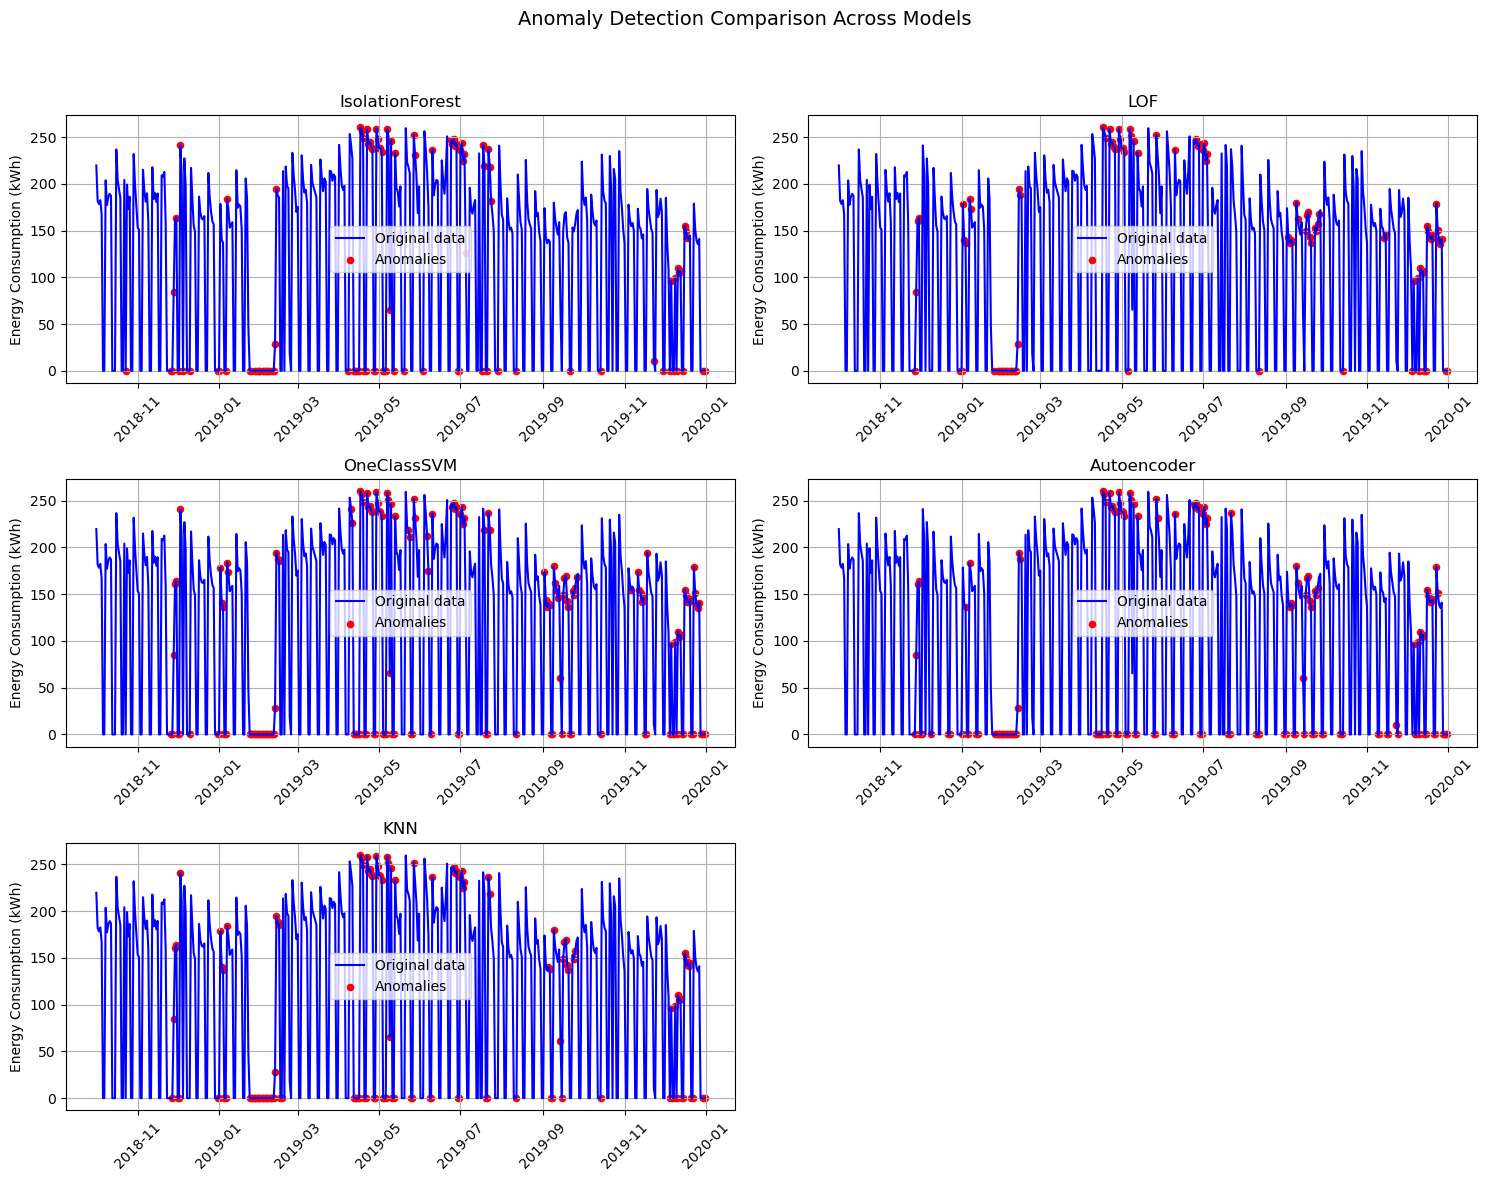

In [84]:
models = ["IsolationForest", "LOF", "OneClassSVM", "Autoencoder", "KNN"]
y_actual = df_test['y']  # Data asli (misalnya, list atau array nilai)
preds = [if_pred, lof_pred, ocsvm_pred, ae_pred, knn_pred]  # List prediksi anomali (0 atau 1)
plot_anomalies(models, y_actual, preds)